In [ ]:
%reload_ext nb_black

In [1]:
import json
import pandas as pd

with open("../secrets.json", "r") as f:
    secrets = json.load(f)

In [48]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2


CLIENT_ID = secrets["spotify_client_id"]
CLIENT_SECRET = secrets["spotify_client_secret"]

credentials = oauth2.SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

# track = "coldplay yellow"
# res = spotify.search(track, type="track", market="US", limit=1)
# print(res)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


In [9]:
res = sp.categories(limit = 50)

In [10]:
cat_ids = []
for item in res['categories']['items']:
    cat_ids.append(item['id'])

In [14]:
res = sp.category_playlists(category_id = cat_ids[0], limit = 10)

In [22]:
playlists_by_cat = {}
total
for cat in cat_ids:
    res = sp.category_playlists(category_id = cat, limit = 10)
    playlists = []
    num_playlists_in_cat = 0
    for item in res['playlists']['items']:
        playlist_info = {}
        i_name = item['name']
        i_id = item['id']
        num_tracks = item['tracks']['total']
        i_uri = item['uri']

        playlist_info['name'] = i_name
        playlist_info['id'] = i_id
        playlist_info['size'] = num_tracks
        playlist_info['uri'] = i_uri
        if num_tracks <= 100:
            playlists.append(playlist_info)
            num_playlists_in_cat+=1
        print(num_playlists_in_cat)
    playlists_by_cat[cat] = playlists   

1
2
3
4
5
6
7
8
9
10
0
1
2
2
3
3
4
4
5
1
1
2
3
4
5
5
5
6
7
1
2
3
4
5
6
1
1
2
3
4
5
6
7
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
0
1
1
1
1
0
1
2
3
4
5
6
7
7
7
0
1
1
1
2
3
4
5
6
6
0
1
2
3
4
4
4
5
1
2
3
4
5
6
6
6
7
7
0
0
0
1
1
2
3
0
0
1
2
0
1
2
3
3
4
5
6
7
8
1
1
1
1
1
1
1
1
1
1
1
2
3
4
5
6
7
8
9
1
2
3
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
5
6
7
8
9
1
2
2
3
4
5
6
7
8
9
0
0
1
2
3
4
4
5
6
7
1
2
3
4
5
6
7
7
8
9
1
2
2
3
4
5
6
7
8
9
1
1
2
3
4
5
1
2
3
4
5
6
7
7
8
9
1
2
3
4
4
5
6
6
7
8
1
1
2
3
3
3
3
3
3
3
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
1
2
3
4
5
1
2
3
4
5
6
7
7
7


In [60]:

with open('../data/playlists_by_cat.json', 'w') as fp:
    json.dump(playlists_by_cat, fp)

In [30]:
#quick count to see how many songs we're working with
total_tracks = 0
for item in playlists_by_cat:
    for p in playlists_by_cat[item]:
        #print(p['size'])
        total_tracks+=p['size']
total_tracks

16229

In [31]:

all_track_ids = []
for item in playlists_by_cat:
    for p in playlists_by_cat[item]:

        pl_id = p['id']
        offset = 0

        track_ids = []

        while True:
            response = sp.playlist_tracks(pl_id,
                                         offset=offset,
                                         fields='items.track.id,total',
                                         additional_types=['track'])
            #store the track ids from the playlist
            for item in response['items']:
                try:
                    track_ids.append( item['track']['id'])
                except:
                    pass

            offset = offset + len(response['items'])
            print(offset, "/", response['total'])

            if len(response['items']) == 0:
                break

        #Add the per_playlist ids to the master list
        all_track_ids.extend(track_ids)

50 / 50
50 / 50
51 / 51
51 / 51
50 / 50
50 / 50
68 / 68
68 / 68
53 / 53
53 / 53
50 / 50
50 / 50
47 / 47
47 / 47
25 / 25
25 / 25
50 / 50
50 / 50
50 / 50
50 / 50
100 / 100
100 / 100
100 / 100
100 / 100
100 / 100
100 / 100
50 / 50
50 / 50
75 / 75
75 / 75
50 / 50
50 / 50
86 / 86
86 / 86
100 / 100
100 / 100
75 / 75
75 / 75
60 / 60
60 / 60
76 / 76
76 / 76
75 / 75
75 / 75
76 / 76
76 / 76
100 / 100
100 / 100
50 / 50
50 / 50
78 / 78
78 / 78
50 / 50
50 / 50
100 / 100
100 / 100
52 / 52
52 / 52
80 / 80
80 / 80
100 / 100
100 / 100
100 / 100
100 / 100
60 / 60
60 / 60
100 / 100
100 / 100
100 / 100
100 / 100
50 / 50
50 / 50
61 / 61
61 / 61
51 / 51
51 / 51
93 / 93
93 / 93
50 / 50
50 / 50
100 / 100
100 / 100
100 / 100
100 / 100
50 / 50
50 / 50
100 / 100
100 / 100
100 / 100
100 / 100
100 / 100
100 / 100
50 / 50
50 / 50
100 / 100
100 / 100
60 / 60
60 / 60
100 / 100
100 / 100
84 / 84
84 / 84
56 / 56
56 / 56
98 / 98
98 / 98
60 / 60
60 / 60
100 / 100
100 / 100
70 / 70
70 / 70
100 / 100
100 / 100
75 / 75
75 /

In [32]:
len(all_track_ids)

16219

In [33]:
pd.DataFrame(all_track_ids).to_csv("gen_playlists_track_ids.csv")

In [34]:
track_ids_df = pd.DataFrame(all_track_ids)


In [36]:
track_ids_df.nunique() # nearly 3000 duplicates

0    13071
dtype: int64

In [37]:
track_ids_df = track_ids_df.drop_duplicates()

In [40]:
all_track_ids = list(track_ids_df[0])

In [42]:
all_track_ids

['4Oun2ylbjFKMPTiaSbbCih',
 '2SAqBLGA283SUiwJ3xOUVI',
 '3H7ihDc1dqLriiWXwsc2po',
 '6UelLqGlWMcVH1E5c4H7lY',
 '7ytR5pFWmSjzHJIeQkgog4',
 '6wQlQrTY5mVS8EGaFZVwVF',
 '5T490vvoFNU6psep0NPmxs',
 '4wosxLl0mAqhneDzya2MfY',
 '0EhpEsp4L0oRGM0vmeaN5e',
 '27ycaQnQAxaPiyeg3nr2aB',
 '1IIKrJVP1C9N7iPtG6eOsK',
 '6o3QUC5oAE4g6WxRIFcZtb',
 '2ygvZOXrIeVL4xZmAWJT2C',
 '1raaNykBg1bDnWENUiglUA',
 '24Yi9hE78yPEbZ4kxyoXAI',
 '3kwgqoBqTwoAH4nT29TYrq',
 '5f1joOtoMeyppIcJGZQvqJ',
 '7y7w4tl4MaRC2UMEj1mPtr',
 '70rFIfYN7lU6iTgUIVP42w',
 '2MbdDtCv5LUVjYy9RuGTgC',
 '3Z8FwOEN59mRMxDCtb8N0A',
 '2KoHxhRyWxJzA0VafWd5Nk',
 '1H7KnK26kc1YyellpbINEn',
 '2LUdpPCiiza6UQugipjMeS',
 '76nqCfJOcFFWBJN32PAksn',
 '4R2kfaDFhslZEMJqAFNpdd',
 '4HBZA5flZLE435QTztThqH',
 '45bE4HXI0AwGZXfZtMp8JR',
 '3tjFYV6RSFtuktYl3ZtYcq',
 '5RqR4ZCCKJDcBLIn4sih9l',
 '59qrUpoplZxbIZxk6X0Bm3',
 '4pvb0WLRcMtbPGmtejJJ6y',
 '66W1rVTnEv86dIkFhoiElg',
 '14wf185UxfNbSy8dwt4r4q',
 '0sf12qNH5qcw8qpgymFOqD',
 '5rZlwNFl01HqLWBQGryKSm',
 '7C1trmcQQ5n5RNy4l6ziCv',
 

In [ ]:
#this will take a minute or two. maybe change sleep to be a little shorter

In [43]:
track_info = []

import time

st = 0
end = len(all_track_ids)
# end = 200
step = 50

list(range(st, end, step))
for i in range(st, end, step):
    print(i)
    if len(all_track_ids) - i >= step - 1:
        response = sp.tracks(all_track_ids[i : i + step])
    else:
        response = sp.tracks(all_track_ids[i:])
    time.sleep(1)
    track_info.append(response)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150

In [44]:
info_dict = {}
for batch in track_info:
    type(batch)
    for ind in batch["tracks"]:
        track_artist = ind["artists"][0]["name"]

        track_name = ind["name"]

        track_album = ind["album"]["name"]

        track_popularity = ind["popularity"]

        track_id = ind["id"]

        info_dict[track_id] = [track_artist, track_name, track_album, track_popularity]
len(info_dict)

13071

In [45]:
tdf = pd.DataFrame(info_dict).T
tdf = tdf.reset_index()
# tdf.columns

tdf = tdf.rename(
    columns={"index": "id", 0: "artist", 1: "title", 2: "album", 3: "popularity"}
)
tdf.head()

,id,artist,title,album,popularity
0,4Oun2ylbjFKMPTiaSbbCih,Cardi B,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),92
1,2SAqBLGA283SUiwJ3xOUVI,Drake,Laugh Now Cry Later (feat. Lil Durk),Laugh Now Cry Later (feat. Lil Durk),83
2,3H7ihDc1dqLriiWXwsc2po,Topic,Breaking Me,Breaking Me,96
3,6UelLqGlWMcVH1E5c4H7lY,Harry Styles,Watermelon Sugar,Fine Line,97
4,7ytR5pFWmSjzHJIeQkgog4,DaBaby,ROCKSTAR (feat. Roddy Ricch),BLAME IT ON BABY,100


In [46]:
tdf.to_csv("../data/gen_track_info.csv")

In [49]:
track_features = []

import time

st = 0
end = len(all_track_ids)
# end = 200
step = 100

list(range(st, end, step))
for i in range(st, end, step):
    print(i)
    if len(all_track_ids) - i >= step - 1:
        response = sp.audio_features(all_track_ids[i : i + step])
    else:
        response = sp.audio_features(all_track_ids[i:])
    time.sleep(0.3)
    track_features.append(response)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000


In [50]:
dfs = []
for item in track_features:
    df = pd.DataFrame.from_dict(item)
    dfs.append(df)

study_track_features = pd.concat(dfs)

In [51]:
study_track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.935,0.454,1,-7.509,1,0.3750,0.0194,0.000000,0.0824,0.357,133.073,audio_features,4Oun2ylbjFKMPTiaSbbCih,spotify:track:4Oun2ylbjFKMPTiaSbbCih,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,https://api.spotify.com/v1/audio-analysis/4Oun...,187541,4
1,0.761,0.518,0,-8.871,1,0.1340,0.2440,0.000035,0.1070,0.522,133.976,audio_features,2SAqBLGA283SUiwJ3xOUVI,spotify:track:2SAqBLGA283SUiwJ3xOUVI,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,https://api.spotify.com/v1/audio-analysis/2SAq...,261493,4
2,0.789,0.720,8,-5.652,0,0.2180,0.2230,0.000000,0.1290,0.664,122.031,audio_features,3H7ihDc1dqLriiWXwsc2po,spotify:track:3H7ihDc1dqLriiWXwsc2po,https://api.spotify.com/v1/tracks/3H7ihDc1dqLr...,https://api.spotify.com/v1/audio-analysis/3H7i...,166794,4
3,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.000000,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
4,0.746,0.690,11,-7.956,1,0.1640,0.2470,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4


In [52]:
study_track_features.to_csv("../data/gen_track_features.csv")

In [53]:
gen_track_info = tdf.copy()
gen_track_features = study_track_features.copy()

In [54]:
gen_track_features.drop(columns=["track_href", "analysis_url", "uri", "type"], inplace=True)

full_df = gen_track_info.merge(gen_track_features, on="id", how="outer")

In [55]:
full_df.shape



(13071, 18)

In [56]:
full_df.to_csv("../data/gen_playlist_tracks_full.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000123A59F5308>,
      dtype=object)

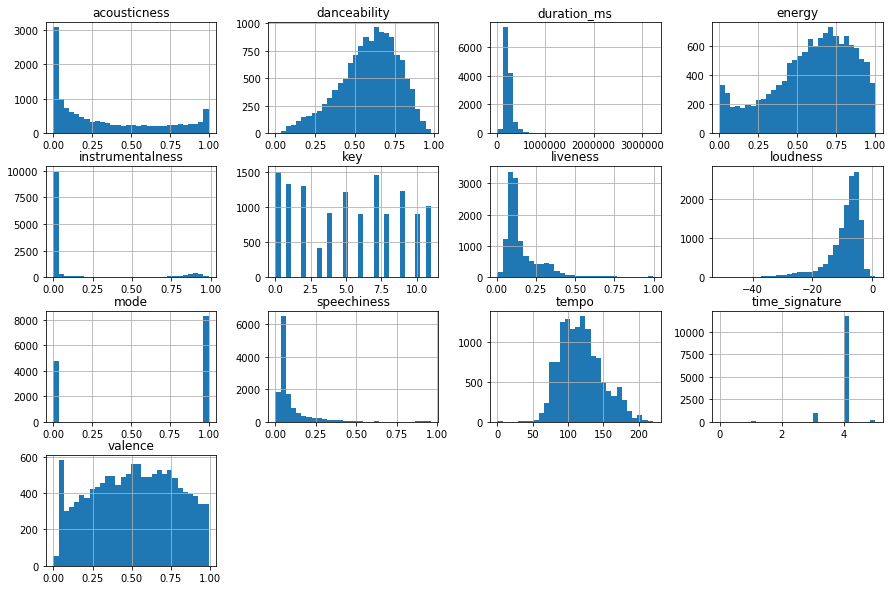

In [58]:
full_df.hist(figsize=(15, 10), bins = 30)

In [16]:
print(json.dumps(res, indent=4, sort_keys=True))

{
    "playlists": {
        "href": "https://api.spotify.com/v1/browse/categories/toplists/playlists?offset=0&limit=10",
        "items": [
            {
                "collaborative": false,
                "description": "Cardi B & Megan Thee Stallion are on top of the Hottest 50!",
                "external_urls": {
                    "spotify": "https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M"
                },
                "href": "https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M",
                "id": "37i9dQZF1DXcBWIGoYBM5M",
                "images": [
                    {
                        "height": null,
                        "url": "https://i.scdn.co/image/ab67706f00000003dbf61f70cd8352147a363ae2",
                        "width": null
                    }
                ],
                "name": "Today's Top Hits",
                "owner": {
                    "display_name": "Spotify",
                    "external_urls": {
       